In [1]:
#pip install textblob
#!pip install vaderSentiment
#!pip install spacy
#!pip install pydantic==1.10.12 spacy
#!python -m spacy download en_core_web_sm
#!pip install wordcloud

In [2]:
import spacy
print(spacy.util.get_installed_models())  # should show "en_core_web_sm"


['en_core_web_sm']


In [3]:
#!pip install wordcloud==1.8.0

In [4]:
import pandas as pd
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import spacy
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('skytrax-data-clean.csv')

In [6]:
df["review_text_clean"] = df["review_text_clean"].fillna("")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emiliawoldan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                   review_text_clean  sentiment_score  \
0  Flight mainly let down by a disagreeable fligh...          -0.4852   
1  Another awful experience by British Airways. T...          -0.8294   
2  The service was rude, full of attitude to me, ...          -0.4588   
3  This flight was a joke. There was four people ...           0.0000   
4  This time British Airways managed to get every...           0.9831   

  sentiment                                           keywords  
0  Negative  quite, member, sleep, rules, wait, concerned, ...  
1  Negative  british, another, flight, awful, nearly, hour,...  
2  Negative  cabin, attitude, serviced, particularly, clean...  
3   Neutral  attention, class, going, paying, cabin, flight...  
4  Positive  soft, boarding, screen, timing, good, witty, p...  


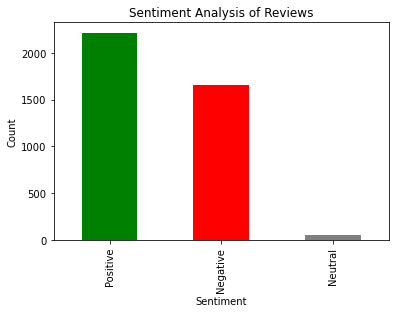

In [7]:
analyzer = SentimentIntensityAnalyzer()
nlp = spacy.load("en_core_web_sm")

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# function to analyze sentiment
def analyze_sentiment(text):
    if pd.isna(text):
        return None, None
    
    blob = TextBlob(text)
    vader_score = analyzer.polarity_scores(text)["compound"]
    
    sentiment_label = "Positive" if vader_score > 0.05 else "Negative" if vader_score < -0.05 else "Neutral"
    return vader_score, sentiment_label

# function to extract keywords
def extract_keywords(text):
    if not text.strip():
        return ""
    
    doc = nlp(text.lower())
    keywords = [token.text for token in doc if token.is_alpha and token.text not in stop_words]
    return ", ".join(set(keywords))  # return unique keywords

# apply functions to DataFrame
df["sentiment_score"], df["sentiment"] = zip(*df["review_text_clean"].apply(analyze_sentiment))
df["keywords"] = df["review_text_clean"].apply(extract_keywords)

print(df[["review_text_clean", "sentiment_score", "sentiment", "keywords"]].head())

df["sentiment"].value_counts().plot(kind="bar", color=["green", "red", "grey"])
plt.title("Sentiment Analysis of Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

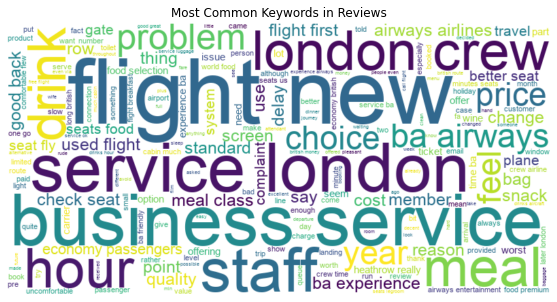

In [8]:
all_keywords = " ".join(df["keywords"].dropna())

wordcloud = WordCloud(width=800, height=400, background_color="white", font_path="/Library/Fonts/Arial.ttf").generate(all_keywords)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Keywords in Reviews")
plt.show()

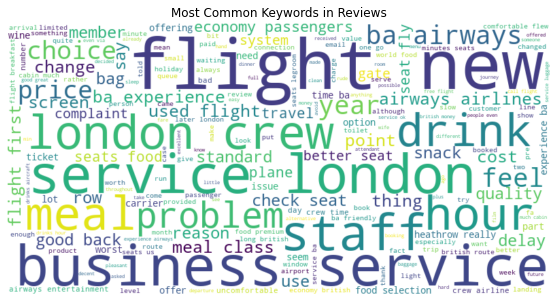

In [9]:
all_keywords = " ".join(df["keywords"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_keywords)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Keywords in Reviews")
plt.show()

In [10]:
df

,date_published,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort_ranking,cabin_staff_service_ranking,food_beverages_ranking,ground_services_ranking,...,recommended,verification_status,review_text_clean,flight_type,departure,destination,layover,sentiment_score,sentiment,keywords
0,2025-03-19,Boeing 787,Solo Leisure,Business Class,Cape Town to London,2025-03-01,5.0,2.0,5.0,4.0,...,yes,Trip Verified,Flight mainly let down by a disagreeable fligh...,direct,Cape Town,London,NaN,-0.4852,Negative,"quite, member, sleep, rules, wait, concerned, ..."
1,2025-03-16,Not informed,Business,Business Class,London to Geneva,2024-12-01,1.0,1.0,NaN,1.0,...,no,Trip Verified,Another awful experience by British Airways. T...,direct,London,Geneva,NaN,-0.8294,Negative,"british, another, flight, awful, nearly, hour,..."
2,2025-03-16,Not informed,Business,Premium Economy,London to New York,2025-01-01,1.0,1.0,1.0,5.0,...,no,Trip Verified,"The service was rude, full of attitude to me, ...",direct,London,New York,NaN,-0.4588,Negative,"cabin, attitude, serviced, particularly, clean..."
3,2025-03-16,Not informed,Business,Business Class,Chambery to London,2025-01-01,1.0,1.0,2.0,1.0,...,no,Trip Verified,This flight was a joke. There was four people ...,direct,Chambery,London,NaN,0.0000,Neutral,"attention, class, going, paying, cabin, flight..."
4,2025-03-07,Boeing 777,Business,Premium Economy,Gatwick to Antigua,2025-03-01,5.0,5.0,4.0,5.0,...,yes,Trip Verified,This time British Airways managed to get every...,direct,Gatwick,Antigua,NaN,0.9831,Positive,"soft, boarding, screen, timing, good, witty, p..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,2012-08-29,Not informed,Not informed,Economy Class,Not informed,NaN,2.0,3.0,1.0,NaN,...,no,Not informed,LHR-JFK-LAX-LHR. Check in was ok apart from be...,direct,Not informed,NaN,NaN,-0.2003,Negative,"haul, angered, designed, quite, basic, termina..."
3916,2012-08-29,Not informed,Not informed,Business Class,Not informed,NaN,4.0,3.0,3.0,NaN,...,yes,Not informed,HKG-LHR in New Club World on Boeing 777-300 - ...,direct,Not informed,NaN,NaN,0.9864,Positive,"generally, rolls, quite, boeing, minute, sleep..."
3917,2012-08-29,Not informed,Not informed,Premium Economy,Not informed,NaN,4.0,3.0,3.0,NaN,...,yes,Not informed,YYZ to LHR - July 2012 - I flew overnight in p...,direct,Not informed,NaN,NaN,0.0933,Positive,"fly, chose, class, etc, good, go, mostly, layo..."
3918,2012-08-29,Not informed,Not informed,Business Class,Not informed,NaN,4.0,3.0,2.0,NaN,...,yes,Not informed,Flew return in CW from LHR to BKK in August 20...,direct,Not informed,NaN,NaN,0.4417,Positive,"side, negatives, set, good, board, least, cw, ..."


In [11]:
df.to_csv('skytrax-data-with-sentiment.csv', index=False)